<a href="https://colab.research.google.com/github/hristinalapanova/data_analytics_2/blob/main/Project_4_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please put your name in a comment format

In [85]:
#lana 
#Rabiul 
#Dee 
#Nafeeur 
#Hristina 
#rachel
#Petvy 
#Taohid

#colab rules


1. Every student should have opinion/contribution. It can be analyzing the project or writing code or conclude the project.

2. Each modifier have put their name as comment format

3. Copy before anything modify so if anything messed up we can recover. 



#Project Start


## Project objective
We have to find out, which patient tend to have re-admit based on the dataset. We will use kNN and Decision Tree method for this project.   

## Data Exploration:
This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set.

#description
VARIABLE NAMES: DESCRIPTION

* Encounter ID: Unique identifier of an encounter
* Patient number: Unique identifier of a patient
* Race Values: Caucasian, Asian, African American, Hispanic, and other
* Gender Values: male, female, and unknown/invalid
* Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* Weight: Weight in pounds
* Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* Time in hospital: Integer number of days between admission and discharge
* Payer code: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* Number of lab procedures: Number of lab tests performed during the encounter
* Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter
* Number of medications: Number of distinct generic names administered during the encounter
* Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter
* Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter
* Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter
* Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* Number of diagnoses Number of diagnoses entered to the system 0%
* Glucose serum test result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* Readmitted Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
from sklearn.model_selection import train_test_split #estimate performance of machine learning model 
from sklearn.linear_model import LogisticRegression #analyze data set to predict outcome 
from sklearn.metrics import accuracy_score

In [88]:
#load the diabetic data set without missing values
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv',na_values=['?'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
len(df)

101766

In [90]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [91]:

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [92]:
#an overview of the dataset
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [93]:
df.index

RangeIndex(start=0, stop=101766, step=1)

In [94]:
df.columns 
#a more clear view of what the columns are 

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [95]:
df.isna()
#ok weight is null so the easier option would be to drop that column 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [96]:
#rachel: count all the non-null values of each column
df.count()

encounter_id                101766
patient_nbr                 101766
race                         99493
gender                      101766
age                         101766
weight                        3197
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                   61510
medical_specialty            51817
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101745
diag_2                      101408
diag_3                      100343
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

#Know your data

What is data, what is feature and what is traget on this dataset?

In [97]:
#show the missing data number (rabiul)
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [98]:
#Petvy 
#show the percentage of missing data - prob not useful and I don't know why code is not running 
100*(df.isnull().sum()/len(df))
def missing_values_percent(df):
    nan_percent=100*(df.isnull().sum()/len(df))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return(nan_percent)

nan_percent=missing_values_percent(df)
nan_percent

diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
race                  2.233555
payer_code           39.557416
medical_specialty    49.082208
weight               96.858479
dtype: float64

Text(0.5, 1.0, 'Missing Data')

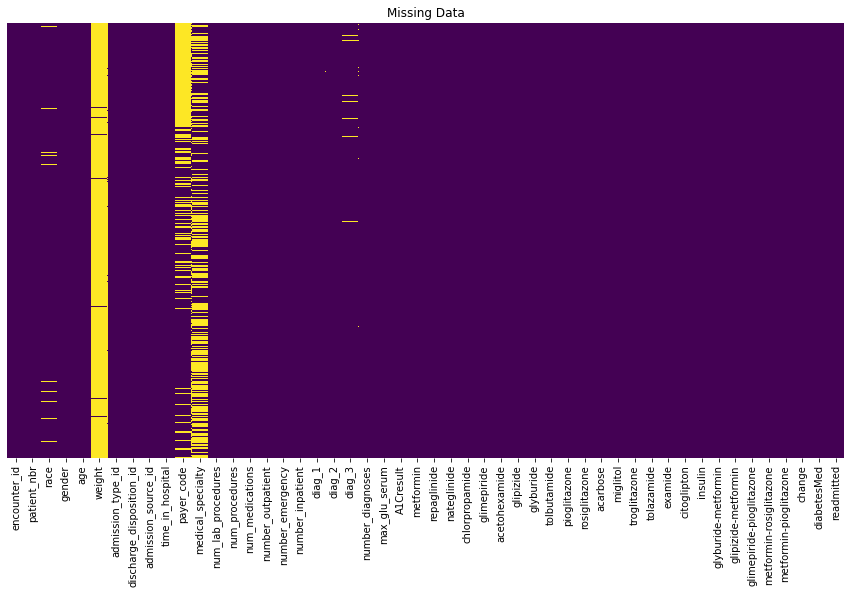

In [99]:
# Visualizing missing data 
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data')

Important columns:




*  patient_nbr                     
* gender                          
* age                             
* admission_type_id               
* discharge_disposition_id        
* time_in_hospital                
* num_medications                 
* number_emergency                
* number_diagnoses                
* change                          
* diabetesMed.



 
  



In [100]:
df["age"].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


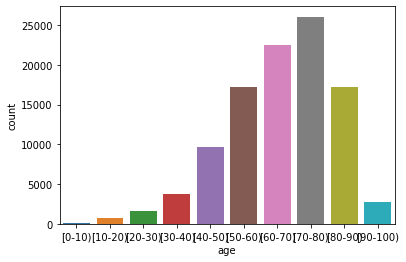

In [101]:
sns.countplot(df['age'])
#the plot shows that the dataset contains more info on older adults and seniors than other ages

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


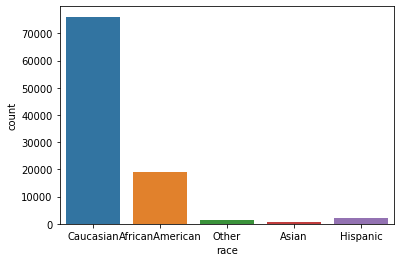

In [102]:
sns.countplot(df['race'])
#we can see that most people in this dataset are caucasian, with low representaion of other groups

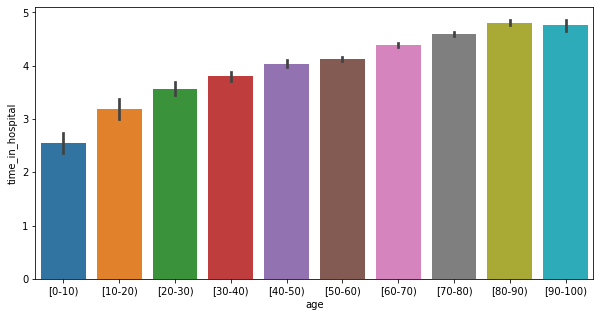

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='time_in_hospital',data=df)
#The older a patient is, the longer they spend in the hospital

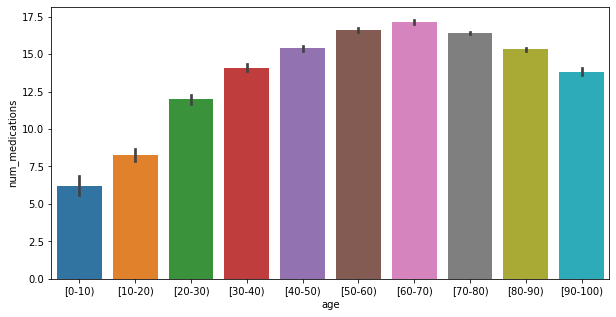

In [104]:
plt.figure(figsize=(10,5))
sns.barplot(x='age',y='num_medications',data=df)
#age seems to have a correlation to amount of meds, a heatmap would show it better

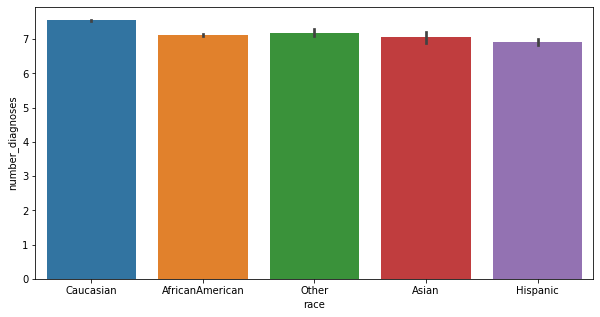

In [105]:
plt.figure(figsize=(10,5))
sns.barplot(x='race',y='number_diagnoses',data=df)
#Although the data is flawed due to missing info of other races, caucasians seem to have slightly more diagnoses of their condition than other groups

In [106]:
df.head(5) #Remaining Columns

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [107]:
#drop unnecessary columns (petvy)
df.drop(['encounter_id','weight','admission_type_id','discharge_disposition_id', 'time_in_hospital','payer_code','medical_specialty',
                     'number_inpatient','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','admission_source_id','num_lab_procedures','num_procedures',
                     'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','max_glu_serum','A1Cresult',
                     'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','diag_1','diag_2','diag_3',
                     'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'],axis=1,inplace=True) 





In [108]:
#also drop duplicate data (rabiul)
df.drop_duplicates(subset='patient_nbr', inplace=True)

In [109]:
df

,patient_nbr,race,gender,age,num_medications,number_outpatient,number_emergency,number_diagnoses,insulin,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),1,0,0,1,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),18,0,0,9,Up,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),13,2,0,6,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),16,0,0,7,Up,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),8,0,0,5,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
101754,183087545,Caucasian,Female,[70-80),33,0,0,9,Steady,Ch,Yes,>30
101755,188574944,Other,Female,[40-50),26,0,1,9,Up,Ch,Yes,>30
101756,140199494,Other,Female,[60-70),17,1,1,9,Steady,No,Yes,>30
101758,120975314,Caucasian,Female,[80-90),22,0,1,9,Up,Ch,Yes,NO


Rabiul: We have to scaled/genaralized all columns so they fit in a same scale. 

##data scaling

In [110]:
#We need to see which unique attributes to replace
print(df["age"].unique())
print(df["race"].unique())
print(df["gender"].unique())
print(df["readmitted"].unique())
print(df["insulin"].unique())
print(df["diabetesMed"].unique())
print(df["change"].unique())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
['Female' 'Male' 'Unknown/Invalid']
['NO' '>30' '<30']
['No' 'Up' 'Steady' 'Down']
['No' 'Yes']
['No' 'Ch']


In [111]:
#Rabiul
df.race.replace({'Caucasian':1,'AfricanAmerican':2, 'Hispanic':3, 'Asian':4,'Other':5, np.nan:0},inplace=True)
df.gender.replace({'Female': 0, 'Male': 1}, inplace=True)
df.readmitted.replace({'NO': 0, '>30': 0, '<30': 1}, inplace=True)
df.age.replace({ '[0-10)':0, '[10-20)':0, '[20-30)':0, '[30-40)':1, '[40-50)':1, '[50-60)':1, '[60-70)':2, '[70-80)':2, '[80-90)':2, '[90-100)':2}, inplace=True)
df.insulin.replace({'No':0,'Up':1,'Steady':2,'Down':3},inplace=True) 
df.diabetesMed.replace({'No':0,'Yes':1},inplace=True)
df.change.replace({'No':0,'Ch':1},inplace=True)

In [112]:
#Drop unknown gender, as there are only 3 of them
print(df[df['gender'] == 'Unknown/Invalid'])

       patient_nbr  race           gender  ...  change  diabetesMed  readmitted
30506    100695042     5  Unknown/Invalid  ...       1            1           0
75551     60524946     0  Unknown/Invalid  ...       0            0           0
82573     78119847     0  Unknown/Invalid  ...       1            1           0

[3 rows x 12 columns]


In [113]:
df = df[df['gender'] != 'Unknown/Invalid'].reset_index(drop=True)

In [114]:
df

,patient_nbr,race,gender,age,num_medications,number_outpatient,number_emergency,number_diagnoses,insulin,change,diabetesMed,readmitted
0,8222157,1,0,0,1,0,0,1,0,0,0,0
1,55629189,1,0,0,18,0,0,9,1,1,1,0
2,86047875,2,0,0,13,2,0,6,0,0,1,0
3,82442376,1,1,1,16,0,0,7,1,1,1,0
4,42519267,1,1,1,8,0,0,5,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71510,183087545,1,0,2,33,0,0,9,2,1,1,0
71511,188574944,5,0,1,26,0,1,9,1,1,1,0
71512,140199494,5,0,2,17,1,1,9,2,0,1,0
71513,120975314,1,0,2,22,0,1,9,1,1,1,0


#Data visualization after scaling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


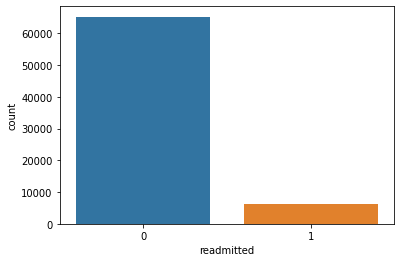

In [115]:
sns.countplot(df['readmitted'])

#Train data

readmitted is our target data and all other columns is our feature data. so we have to make a train model based on the feature we have and answer the ques: should the given patient have to readmitted in 30 days?

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(df.drop('readmitted', axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('readmitted',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])


In [117]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
y = df['readmitted']
x = df.drop('readmitted', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [119]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9100887925610012


In [120]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.8336013423757254


In [121]:
# Import classification_report from sklearn's metrics module
from sklearn.metrics import classification_report

# Fit the test labels and predictions into classification_report and
# print the report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     13017
           1       0.10      0.11      0.11      1286

    accuracy                           0.83     14303
   macro avg       0.51      0.51      0.51     14303
weighted avg       0.84      0.83      0.84     14303



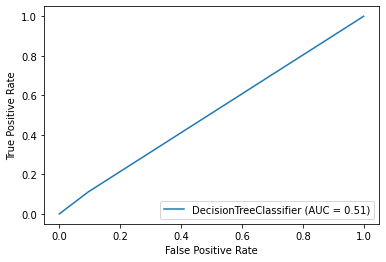

In [122]:
# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve

# Plot a ROC curve using our current model using plot_roc_curve
plot_roc_curve(clf, x_test, y_test)

In [123]:
#testing how big of a factor race, gender, and age play on 
y = df['readmitted']
x = df[["race", "gender","age"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=25)
knn_fit=knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy for KNN:",metrics.accuracy_score(y_test, y_pred))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("Accuracy for Decision Tree:",metrics.accuracy_score(y_test, predict))

Accuracy for KNN: 0.909040061525554
Accuracy for Decision Tree: 0.9141438858980634


In [124]:
# Import classification_report from sklearn's metrics module
from sklearn.metrics import classification_report

# Fit the test labels and predictions into classification_report and
# print the report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     13075
           1       0.00      0.00      0.00      1228

    accuracy                           0.91     14303
   macro avg       0.46      0.50      0.48     14303
weighted avg       0.84      0.91      0.87     14303



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


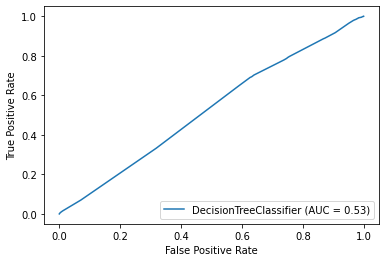

In [125]:
# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve

# Plot a ROC curve using our current model using plot_roc_curve
plot_roc_curve(clf, x_test, y_test)

In [126]:
 # Fit the test labels and predictions into confusion_matrix and
# print the matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

# Make confusion matrix more visual
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=True,
                     cmap='GnBu')
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

[[13075     0]
 [ 1228     0]]


Text(0.5, 1.0, 'Random Forest\n')

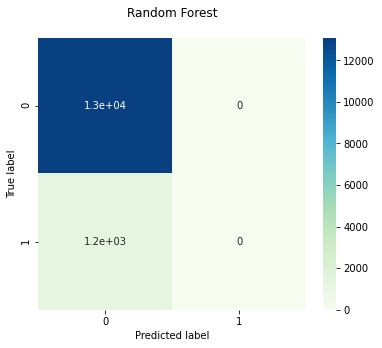

In [127]:
# Call plot_conf_mat with the test labels and predictions
plot_conf_mat(y_test, predict)
#title 
plt.title('Random Forest\n')



In [135]:
# Create a data frame with the models perfoamnce metrics scores

models_scores_table = pd.DataFrame({ 'KNN':[0.91,0.91,0.91,0.86,0.53],
                                     'Decision Tree':[0.83,0.84,0.83,0.84,0.51],},
                                    index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
                                   )
    
print(models_scores_table)

            KNN  Decision Tree
Accuracy   0.91           0.83
Precision  0.91           0.84
Recall     0.91           0.83
F1 Score   0.86           0.84
AUC        0.53           0.51


## Conclusion


According to the table above the two models have similar results. KNN seems to give slightly better results than 
Decision Tree, its AUC score is also better than the Decision Tree's AUC score.
